In [2]:
import pandas as pd

path = '''C:\\Personal\\Uni\\5 сем\\Информационные системы и технологии\\ИСиТ_КР.xlsm'''
df = pd.read_excel(path, sheet_name='Журнал учета', skiprows=5)


In [3]:
print(df.info())
print(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Код преподавателя     20 non-null     int64         
 1   ФИО                   20 non-null     object        
 2   Номер группы          20 non-null     int64         
 3   Специальность         20 non-null     object        
 4   Предмет               20 non-null     object        
 5   Тип занятия           20 non-null     object        
 6   Дата начала курса     20 non-null     datetime64[ns]
 7   Дата окончания курса  20 non-null     datetime64[ns]
 8   Оплата за день        20 non-null     int64         
 9   Сумма оплаты          20 non-null     int64         
 10  Уникальность          20 non-null     int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 1.8+ KB
None
   Код преподавателя                    ФИО  Номер группы  \
0       

In [4]:
import plotly.express as px

df['Курс'] = df['Номер группы'].astype('str') + ", " + df["Предмет"]

# Создание диаграммы
fig = px.timeline(df,
                  x_start="Дата начала курса",
                  x_end="Дата окончания курса",
                  y='Курс',
                  color="ФИО",
                  title="Расписание курсов",
                  labels={"Тип занятия": "Тип занятия", "ФИО": "Преподаватель"},
                  color_discrete_map={"лекция": "blue", "практика": "green"},
                  template='plotly_white'
                  )

# Настройка внешнего вида
fig.update_yaxes(categoryorder="category descending", )
fig.update_layout(
    width=1200,
    height=800,
    font=dict(size=12),
    title_font_size=20,
    xaxis_title="Период проведения курса",
    yaxis_title="Курс",
    legend_title="Преподаватель")

# Отображение диаграммы
fig.show()


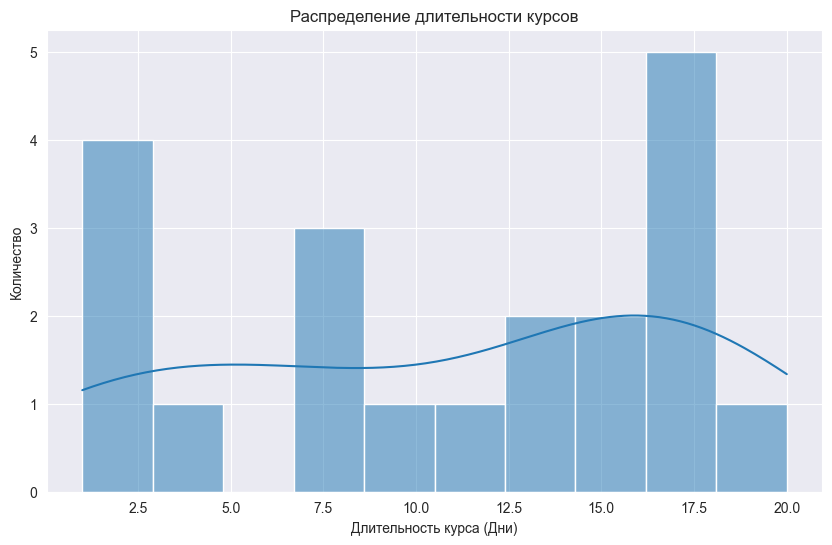

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df['длина курса'] = (df['Дата окончания курса'] - df['Дата начала курса']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='длина курса',
    bins=10,
    kde=True,
)

plt.title('Распределение длительности курсов')
plt.xlabel('Длительность курса (Дни)')
plt.ylabel('Количество')

plt.show()

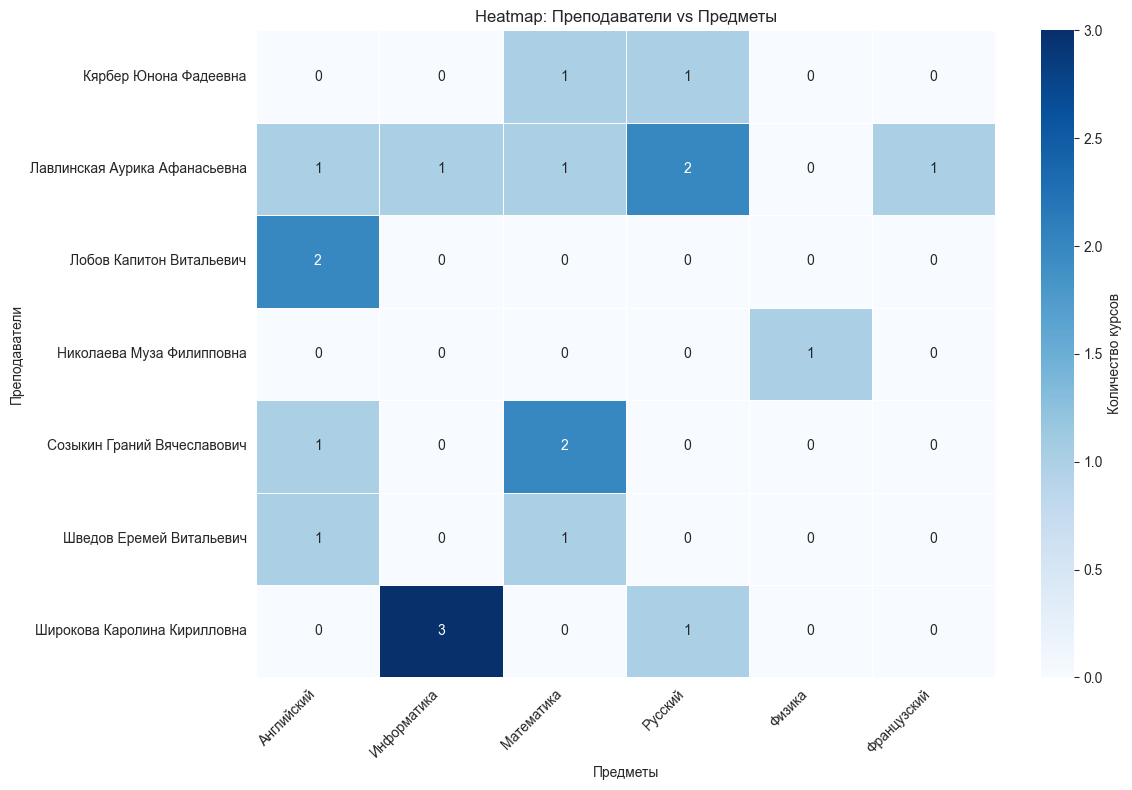

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(
    index='ФИО',
    columns='Предмет',
    values='Код преподавателя',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap='Blues',
    fmt='g',
    linewidths=0.5,
    cbar_kws={'label': 'Количество курсов'}
)

plt.title('Heatmap: Преподаватели vs Предметы')
plt.xlabel('Предметы')
plt.ylabel('Преподаватели')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [10]:
def find_conflicts_and_gaps(df):
    conflicts = []
    gaps = []

    for instructor, group in df.groupby('ФИО'):
        courses = group.sort_values('Дата начала курса').reset_index(drop=True)

        for i in range(len(courses)):
            for j in range(i + 1, len(courses)):
                course1 = courses.iloc[i]
                course2 = courses.iloc[j]
                if (course1['Дата начала курса'] <= course2['Дата окончания курса'] and
                        course2['Дата начала курса'] <= course1['Дата окончания курса']):
                    conflicts.append({
                        'instructor': instructor,
                        'course1_subject': course1['Предмет'],
                        'course1_group': course1['Номер группы'],
                        'course1_start': course1['Дата начала курса'],
                        'course1_end': course1['Дата окончания курса'],
                        'course2_subject': course2['Предмет'],
                        'course2_group': course2['Номер группы'],
                        'course2_start': course2['Дата начала курса'],
                        'course2_end': course2['Дата окончания курса']
                    })

        for i in range(len(courses) - 1):
            current_end = courses.iloc[i]['Дата окончания курса']
            next_start = courses.iloc[i + 1]['Дата начала курса']
            if (next_start-current_end).days>15:
                gap_days = (next_start - current_end).days
                gaps.append({
                    'instructor': instructor,
                    'gap_start': current_end,
                    'gap_end': next_start,
                    'gap_days': gap_days,
                    'after_course': courses.iloc[i]['Предмет'],
                    'before_course': courses.iloc[i + 1]['Предмет']
                })

    return conflicts, gaps

conflicts, gaps = find_conflicts_and_gaps(df)

print("Конфликты расписания:")
if conflicts:
    for conflict in conflicts:
        print(f"- Преподаватель: {conflict['instructor']}")
        print(f"\tКурс 1: {conflict['course1_subject']} (Группа {conflict['course1_group']}) с {conflict['course1_start'].date()} по {conflict['course1_end'].date()}")
        print(f"\tКурс 2: {conflict['course2_subject']} (Группа {conflict['course2_group']}) с {conflict['course2_start'].date()} по {conflict['course2_end'].date()}")
else:
    print("Конфликты не найдены.")

print("Пробелы в расписании:")
if gaps:
    for gap in gaps:
        print(f"- Преподаватель: {gap['instructor']}")
        print(f"\tПробел в {gap['gap_days']} дней с {gap['gap_start'].date()} по {gap['gap_end'].date()}")
        print(f"\tМежду: {gap['after_course']} и {gap['before_course']}")
else:
    print("Пробелы не найдены.")

Конфликты расписания:
- Преподаватель: Кярбер Юнона Фадеевна
	Курс 1: Русский (Группа 122) с 2025-03-04 по 2025-03-22
	Курс 2: Математика (Группа 122) с 2025-03-11 по 2025-03-28
- Преподаватель: Лавлинская Аурика Афанасьевна
	Курс 1: Русский (Группа 8305) с 2025-04-22 по 2025-04-29
	Курс 2: Русский (Группа 4318) с 2025-04-22 по 2025-05-09
- Преподаватель: Широкова Каролина Кирилловна
	Курс 1: Информатика (Группа 8303) с 2025-07-05 по 2025-07-19
	Курс 2: Информатика (Группа 921) с 2025-07-19 по 2025-07-28
Пробелы в расписании:
- Преподаватель: Лавлинская Аурика Афанасьевна
	Пробел в 44 дней с 2025-03-09 по 2025-04-22
	Между: Французский и Русский
- Преподаватель: Лавлинская Аурика Афанасьевна
	Пробел в 40 дней с 2025-05-09 по 2025-06-18
	Между: Русский и Информатика
- Преподаватель: Созыкин Граний Вячеславович
	Пробел в 17 дней с 2025-03-02 по 2025-03-19
	Между: Английский и Математика
- Преподаватель: Созыкин Граний Вячеславович
	Пробел в 28 дней с 2025-04-06 по 2025-05-04
	Между: Мате